# Python Libraries

In [278]:
#importing necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



# Data Read In

In [279]:
#Read-in the dataset
game = pd.read_csv('gaming_data.csv') # Make sure data and code are in the same path
game.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [280]:
# Display the summary information of the DataFrame including the data types of each column 
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [281]:
# Generate descriptive statistics. This method provides a quick overview of the numerical columns in the DataFrame
# count, mean, standard deviation, minimum, maximum, and the quartiles (25%, 50%, and 75%).
game.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [282]:
# InGamePurchases can be changed to Yes/ No values for clearer representation
# Change InGamePurchases from 0/1 to 'No'/'Yes'
game['InGamePurchases'] = game['InGamePurchases'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Verify the change
game['InGamePurchases'].value_counts()

# Make Age Groups
bins = [0, 18, 25, 35, 45, 50]
labels = ['<=18', '19-25', '26-35', '36-45', '46-50']
game['AgeGroup'] = pd.cut(game['Age'], bins=bins, labels=labels, right=False)

In [283]:
# Verify the change
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PlayerID                   40034 non-null  int64   
 1   Age                        40034 non-null  int64   
 2   Gender                     40034 non-null  object  
 3   Location                   40034 non-null  object  
 4   GameGenre                  40034 non-null  object  
 5   PlayTimeHours              40034 non-null  float64 
 6   InGamePurchases            40034 non-null  object  
 7   GameDifficulty             40034 non-null  object  
 8   SessionsPerWeek            40034 non-null  int64   
 9   AvgSessionDurationMinutes  40034 non-null  int64   
 10  PlayerLevel                40034 non-null  int64   
 11  AchievementsUnlocked       40034 non-null  int64   
 12  EngagementLevel            40034 non-null  object  
 13  AgeGroup                   4003

In [284]:
# Check for duplicates
game.duplicated().value_counts()

False    40034
Name: count, dtype: int64

# Exploratory Data Analysis

### Age/ Gender

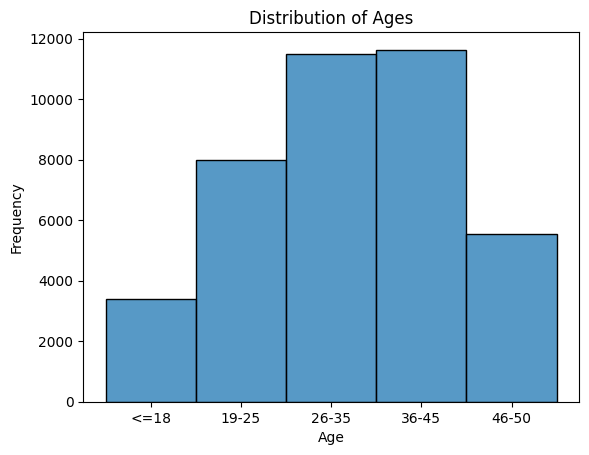

In [285]:
# Age Distribution
sns.histplot(game['AgeGroup'])
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

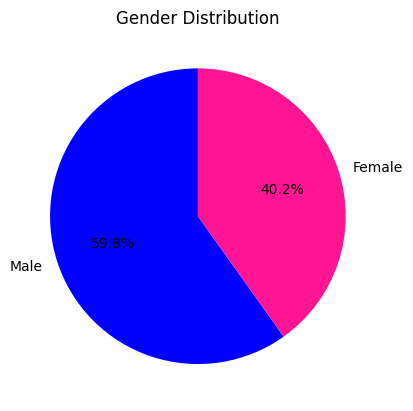

In [286]:
# Gender Distribution
game['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'deeppink'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

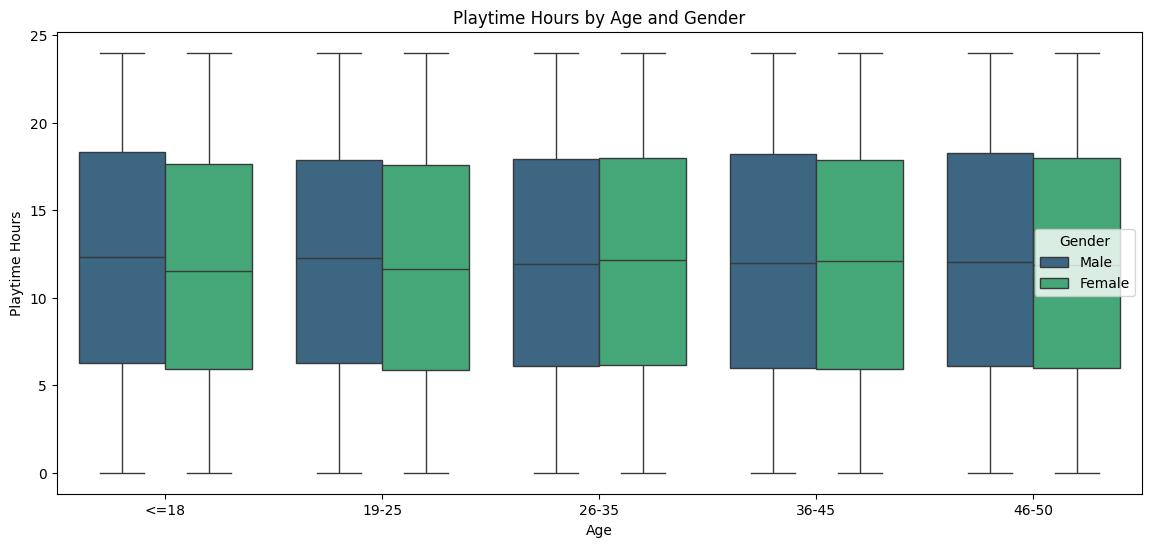

In [287]:
# Playtime Hours by Age and Gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='PlayTimeHours', hue='Gender', data=game, palette='viridis')
plt.title('Playtime Hours by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Playtime Hours')
plt.legend(title='Gender')
plt.show()

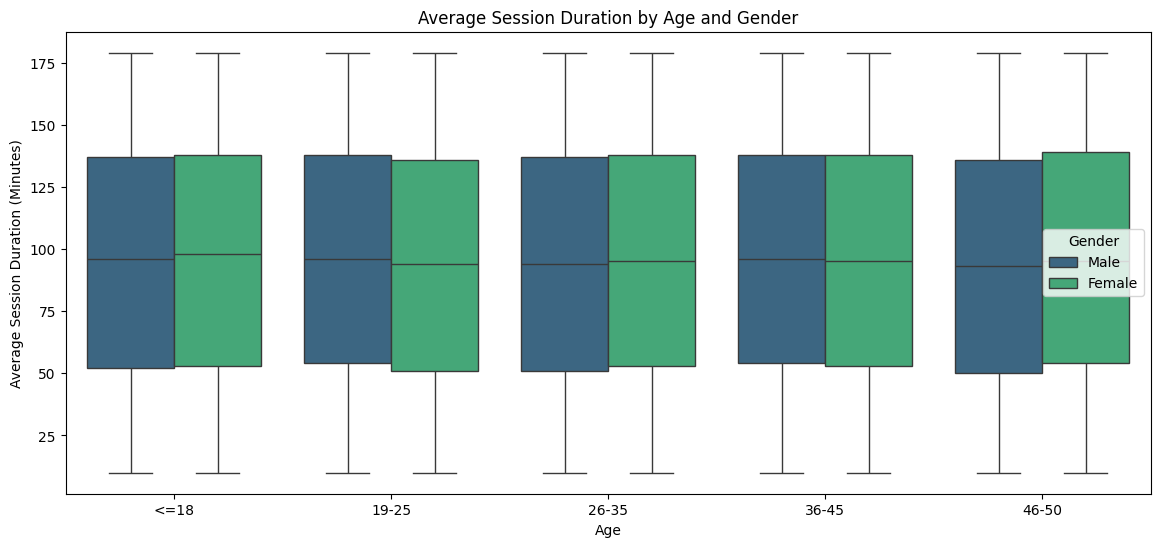

In [288]:
# Average Session Duration by Age and Gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='AvgSessionDurationMinutes', hue='Gender', data=game, palette='viridis')
plt.title('Average Session Duration by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Session Duration (Minutes)')
plt.legend(title='Gender')
plt.show()

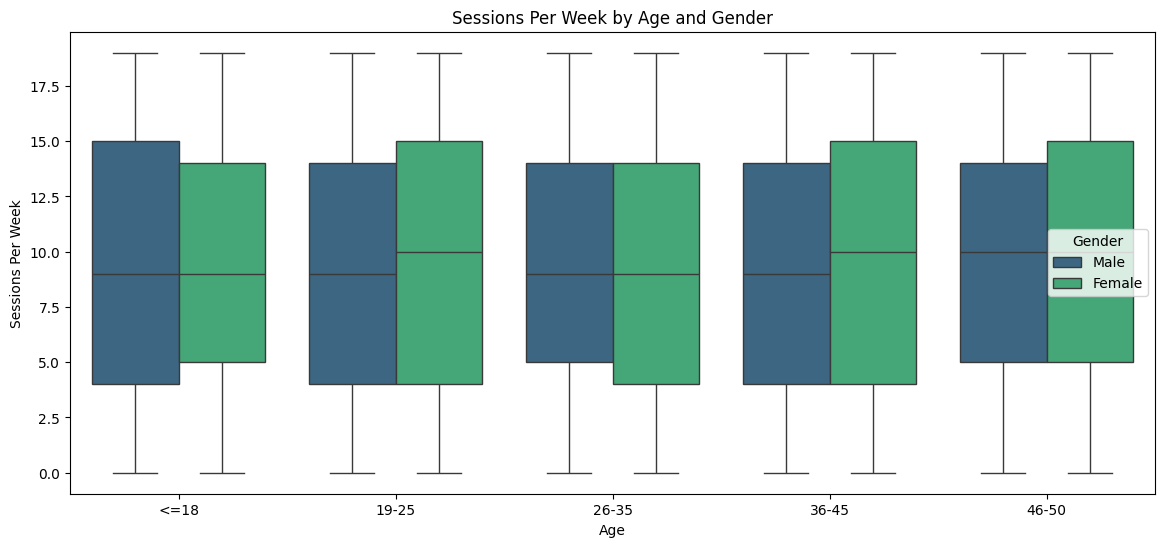

In [289]:
# Sessions Per Week by Age and Gender
plt.figure(figsize=(14, 6))
sns.boxplot(x='AgeGroup', y='SessionsPerWeek', hue='Gender', data=game, palette='viridis')
plt.title('Sessions Per Week by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Sessions Per Week')
plt.legend(title='Gender')
plt.show()

In [290]:
# Value Check
age_gen_sess = game.groupby(['AgeGroup', 'Gender'])['SessionsPerWeek'].describe()
age_gen_sess

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/1683649769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gen_sess = game.groupby(['AgeGroup', 'Gender'])['SessionsPerWeek'].describe()


count      mean       std  min  25%   50%   75%   max
AgeGroup Gender                                                        
<=18     Female  1402.0  9.495720  5.823019  0.0  5.0   9.0  14.0  19.0
         Male    1986.0  9.399295  5.823446  0.0  4.0   9.0  15.0  19.0
19-25    Female  3179.0  9.505505  5.826543  0.0  4.0  10.0  15.0  19.0
         Male    4801.0  9.280775  5.763671  0.0  4.0   9.0  14.0  19.0
26-35    Female  4565.0  9.392333  5.767978  0.0  4.0   9.0  14.0  19.0
         Male    6929.0  9.498052  5.740996  0.0  5.0   9.0  14.0  19.0
36-45    Female  4667.0  9.564174  5.821526  0.0  4.0  10.0  15.0  19.0
         Male    6971.0  9.400086  5.720275  0.0  4.0   9.0  14.0  19.0
46-50    Female  2262.0  9.703802  5.812322  0.0  5.0  10.0  15.0  19.0
         Male    3272.0  9.668704  5.649794  0.0  5.0  10.0  14.0  19.0

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/3871242155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre', y='Age', data=game, palette='viridis', ax=axs[0])


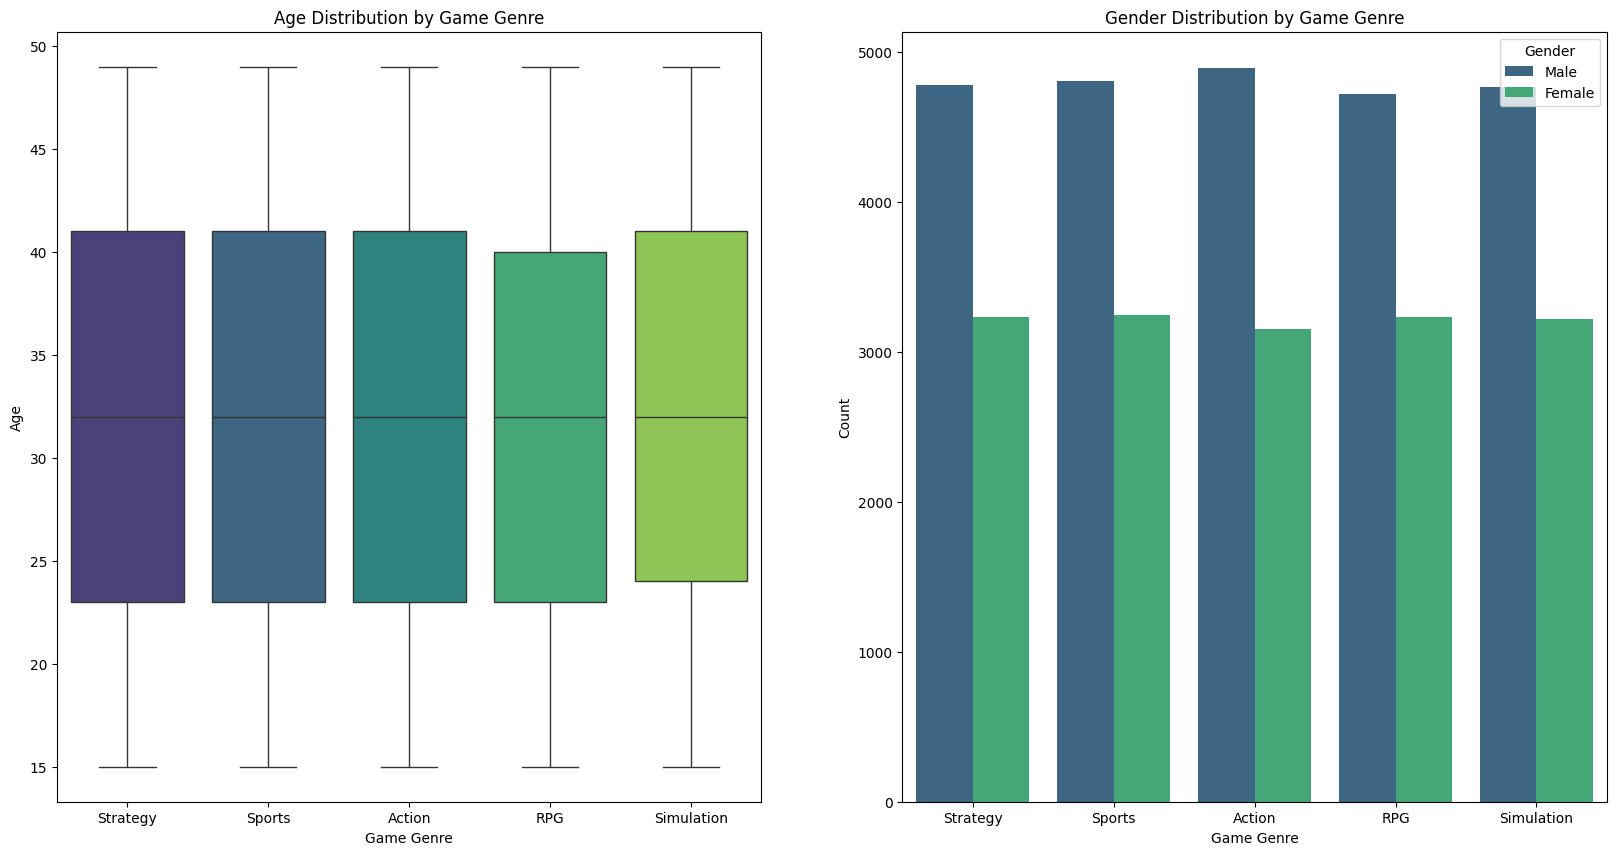

In [291]:
# Set up the figure and axes for a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Age Distribution by Game Genre
sns.boxplot(x='GameGenre', y='Age', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('Age Distribution by Game Genre')
axs[0].set_xlabel('Game Genre')
axs[0].set_ylabel('Age')

# Gender Distribution by Game Genre
sns.countplot(x='GameGenre', hue='Gender', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Gender Distribution by Game Genre')
axs[1].set_xlabel('Game Genre')
axs[1].set_ylabel('Count')

plt.show()

In [292]:
# Value Check
playtime_englevel = game.groupby('GameGenre')['Age'].describe()
playtime_englevel

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,31.952482,9.986865,15.0,23.0,32.0,41.0,49.0
RPG,7952.0,31.813003,10.080876,15.0,23.0,32.0,40.0,49.0
Simulation,7983.0,32.185895,10.094332,15.0,24.0,32.0,41.0,49.0
Sports,8048.0,31.994036,10.049423,15.0,23.0,32.0,41.0,49.0
Strategy,8012.0,32.016725,10.003780,15.0,23.0,32.0,41.0,49.0


In [293]:
# Value Check
gender_genre = game.groupby(['GameGenre', 'Gender']).size().unstack(fill_value=0)
gender_genre

Gender,Female,Male
GameGenre,,
Action,3149,4890
RPG,3235,4717
Simulation,3218,4765
Sports,3243,4805
Strategy,3230,4782


In [294]:
# Value Check
gender_genre = game.groupby(['GameGenre', 'Gender']).size().unstack(fill_value=0)
gender_genre

Gender,Female,Male
GameGenre,,
Action,3149,4890
RPG,3235,4717
Simulation,3218,4765
Sports,3243,4805
Strategy,3230,4782


### Location

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/2091985694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=game, palette='viridis')


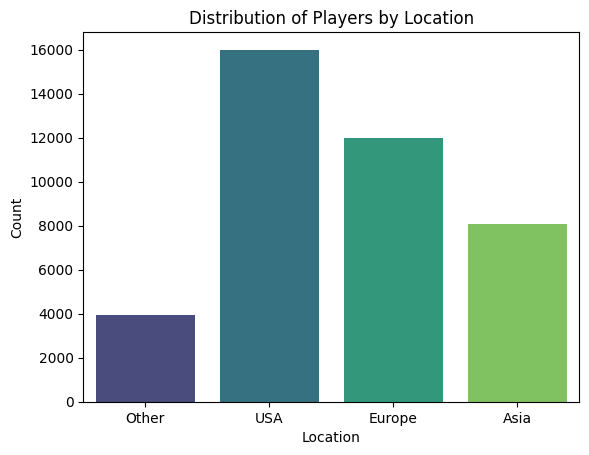

In [295]:
# Location Distribution
sns.countplot(x='Location', data=game, palette='viridis')
plt.title('Distribution of Players by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [296]:
# Value Check
loc_playtime = game.groupby('Location')['PlayTimeHours'].describe()
loc_playtime

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Asia,8095.0,12.194502,6.958223,0.000158,6.171252,12.278865,18.208090,23.997245
Europe,12004.0,11.931396,6.879616,0.000115,6.034050,11.926281,17.863444,23.993926
Other,3935.0,12.060967,6.914991,0.007567,6.149607,12.079096,18.075330,23.999592
USA,16000.0,11.999035,6.917689,0.000630,6.013741,11.946785,17.940668,23.995123


In [297]:
# Value Check
loc_avg = game.groupby('Location')['AvgSessionDurationMinutes'].describe()
loc_avg

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Asia,8095.0,94.836072,49.324001,10.0,52.0,95.0,138.0,179.0
Europe,12004.0,94.183106,48.587217,10.0,52.0,94.0,136.0,179.0
Other,3935.0,94.943837,49.442357,10.0,53.0,95.0,138.0,179.0
USA,16000.0,95.189813,49.063158,10.0,53.0,95.0,138.0,179.0


In [298]:
# Value Check
loc_sess = game.groupby('Location')['SessionsPerWeek'].describe()
loc_sess

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Asia,8095.0,9.487832,5.748245,0.0,5.0,9.0,15.0,19.0
Europe,12004.0,9.482506,5.791810,0.0,4.0,9.0,15.0,19.0
Other,3935.0,9.442440,5.797566,0.0,4.0,9.0,14.0,19.0
USA,16000.0,9.462813,5.742391,0.0,4.0,9.0,14.0,19.0


In [299]:
# Value Check
genre_loc = game.groupby(['GameGenre', 'Location']).size().unstack(fill_value=0)
genre_loc

Location,Asia,Europe,Other,USA
GameGenre,,,,
Action,1656,2428,792,3163
RPG,1620,2372,787,3173
Simulation,1623,2414,795,3151
Sports,1582,2431,775,3260
Strategy,1614,2359,786,3253


### Genre

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/1562611582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GameGenre', data=game, palette='viridis')


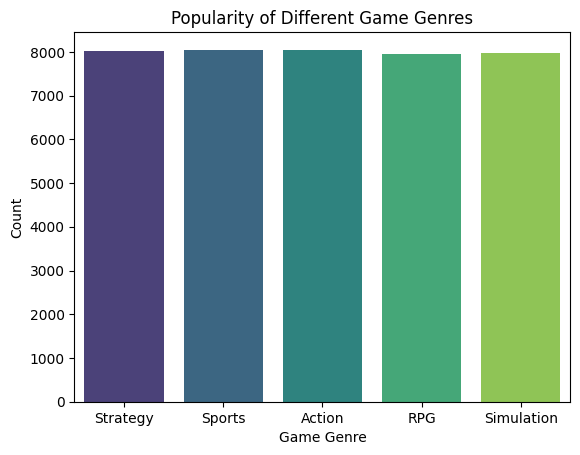

In [300]:
# Game Genre Popularity
sns.countplot(x='GameGenre', data=game, palette='viridis')
plt.title('Popularity of Different Game Genres')
plt.xlabel('Game Genre')
plt.ylabel('Count')
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/2218592952.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/2218592952.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/2218592952.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GameGenre

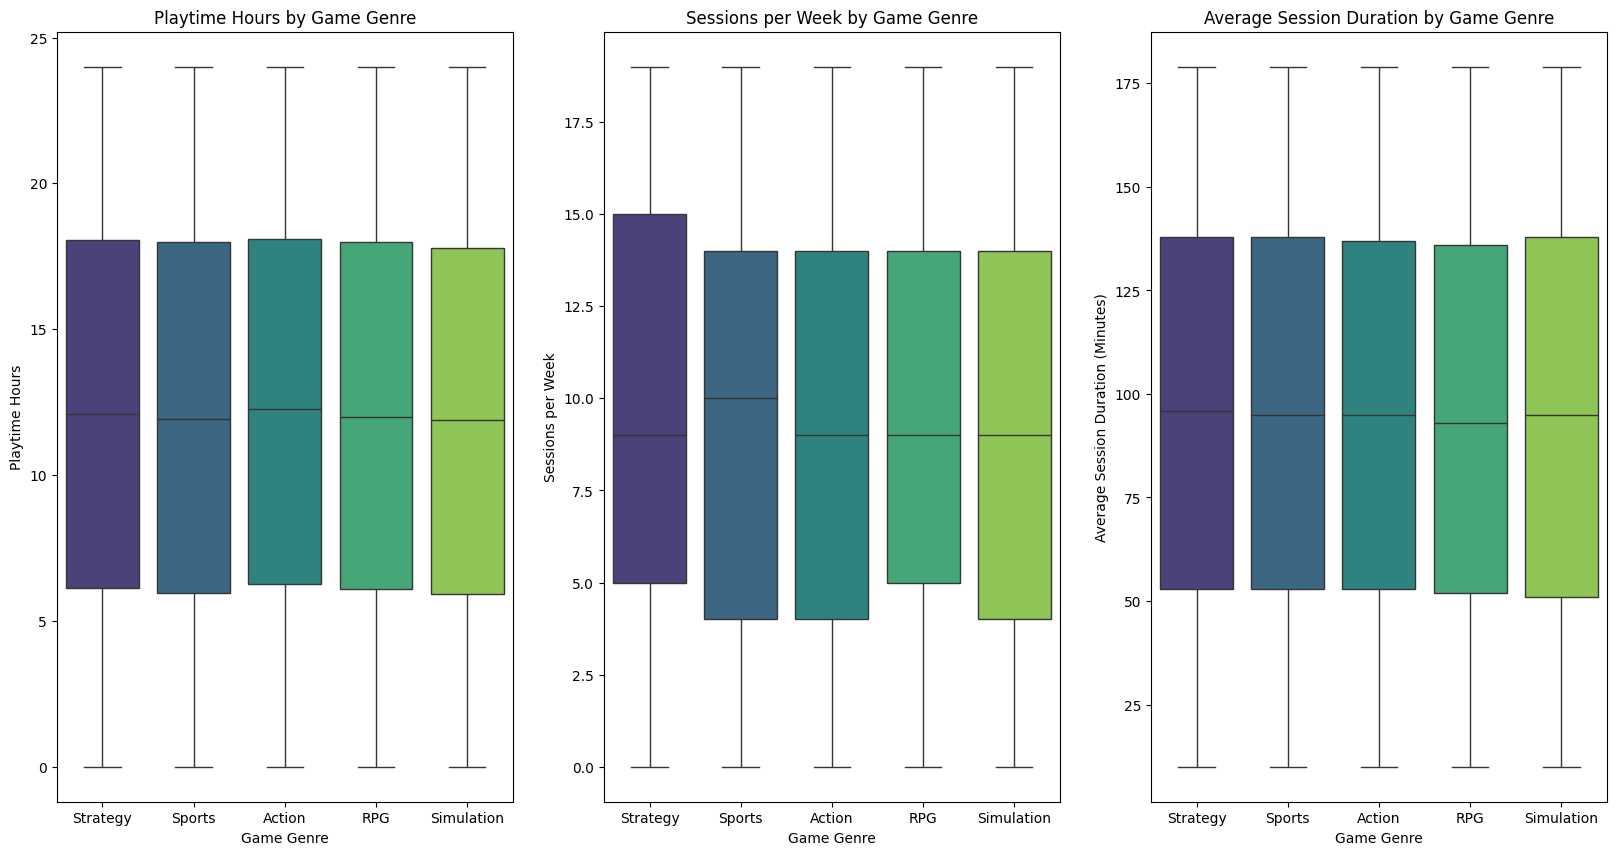

In [301]:
# GameGenre Analysis

# Set up the figure and axes for a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Playtime by Game Genre
sns.boxplot(x='GameGenre', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('Playtime Hours by Game Genre')
axs[0].set_xlabel('Game Genre')
axs[0].set_ylabel('Playtime Hours')

# Sessions per Week by Game Genre
sns.boxplot(x='GameGenre', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Sessions per Week by Game Genre')
axs[1].set_xlabel('Game Genre')
axs[1].set_ylabel('Sessions per Week')

# Average Session Duration by Game Genre
sns.boxplot(x='GameGenre', y='AvgSessionDurationMinutes', data=game, palette='viridis', ax=axs[2])
axs[2].set_title('Average Session Duration by Game Genre')
axs[2].set_xlabel('Game Genre')
axs[2].set_ylabel('Average Session Duration (Minutes)')

plt.show()

In [302]:
# # Value Check
playtime_genre= game.groupby('GameGenre')['PlayTimeHours'].describe()
playtime_genre

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,12.164645,6.879331,0.000630,6.268037,12.269403,18.078077,23.995739
RPG,7952.0,12.008113,6.915510,0.000158,6.106444,11.979067,17.987556,23.991246
Simulation,7983.0,11.898085,6.890893,0.000950,5.911342,11.897136,17.792838,23.999592
Sports,8048.0,11.968329,6.944544,0.003188,5.961856,11.909736,17.974933,23.997838
Strategy,8012.0,12.081855,6.941233,0.000115,6.126750,12.079734,18.041660,23.991985


In [303]:
# Value Check
sess_genre= game.groupby('GameGenre')['SessionsPerWeek'].describe()
sess_genre

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,9.472820,5.782960,0.0,4.0,9.0,14.0,19.0
RPG,7952.0,9.405810,5.727377,0.0,5.0,9.0,14.0,19.0
Simulation,7983.0,9.440436,5.810046,0.0,4.0,9.0,14.0,19.0
Sports,8048.0,9.497391,5.746044,0.0,4.0,10.0,14.0,19.0
Strategy,8012.0,9.541687,5.751947,0.0,5.0,9.0,15.0,19.0


In [304]:
# Value Check
avg_genre= game.groupby('GameGenre')['AvgSessionDurationMinutes'].describe()
avg_genre

,count,mean,std,min,25%,50%,75%,max
GameGenre,,,,,,,,
Action,8039.0,94.782933,48.955658,10.0,53.0,95.0,137.0,179.0
RPG,7952.0,93.741952,48.810232,10.0,52.0,93.0,136.0,179.0
Simulation,7983.0,94.739572,49.631877,10.0,51.0,95.0,138.0,179.0
Sports,8048.0,95.046098,48.719084,10.0,53.0,95.0,138.0,179.0
Strategy,8012.0,95.641538,48.929982,10.0,53.0,96.0,138.0,179.0


### Player Level

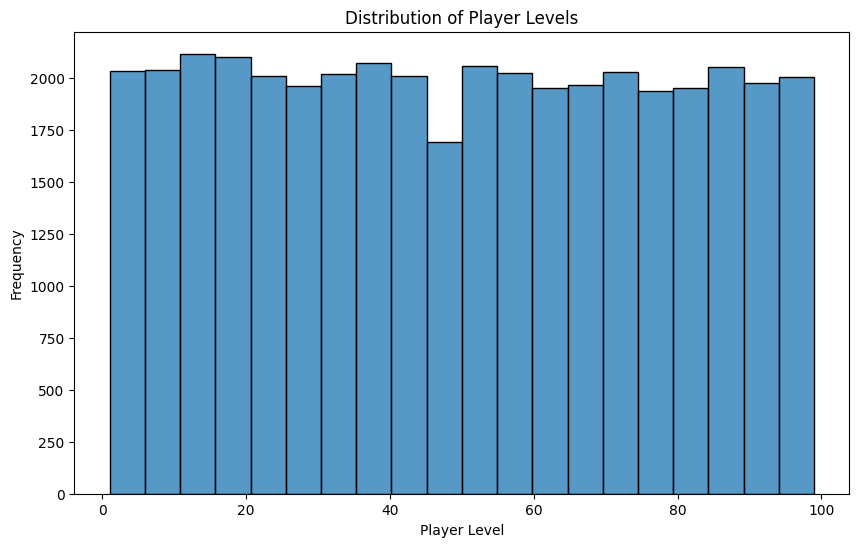

In [305]:
# Player Levels Distribution
plt.figure(figsize=(10, 6))
sns.histplot(game['PlayerLevel'], bins=20)
plt.title('Distribution of Player Levels')
plt.xlabel('Player Level')
plt.ylabel('Frequency')
plt.show()

In [306]:
# Define the bins and labels for the groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for PlayerLevel groups
game['PlayerLevelGroup'] = pd.cut(game['PlayerLevel'], bins=bins, labels=labels, right=False)

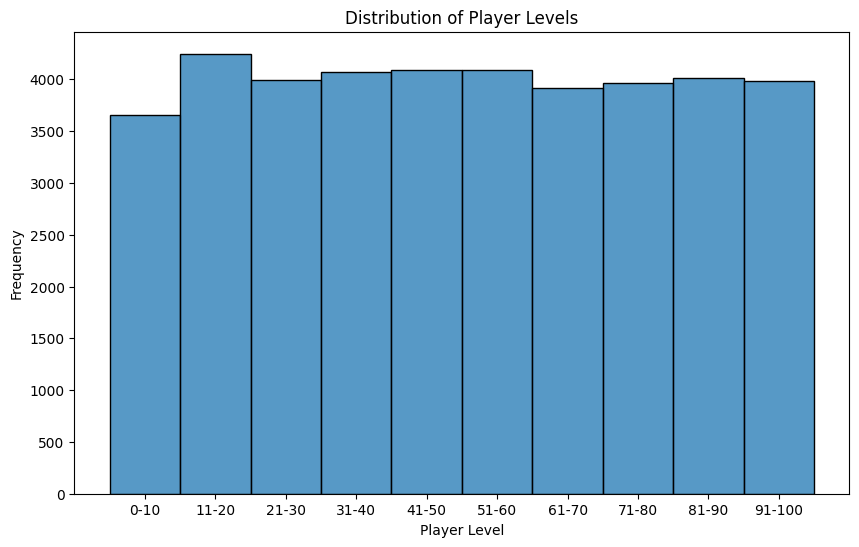

In [307]:
# Player Levels Distribution
plt.figure(figsize=(10, 6))
sns.histplot(game['PlayerLevelGroup'])
plt.title('Distribution of Player Levels')
plt.xlabel('Player Level')
plt.ylabel('Frequency')
plt.show()

### Achievement Unlocked

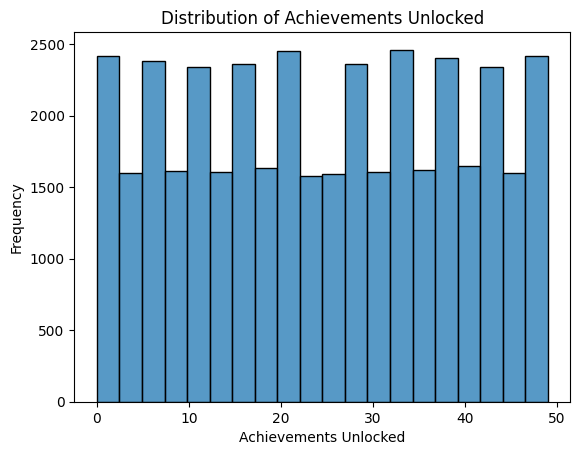

In [308]:
# Achievements Unlocked Distribution
sns.histplot(game['AchievementsUnlocked'], bins=20)
plt.title('Distribution of Achievements Unlocked')
plt.xlabel('Achievements Unlocked')
plt.ylabel('Frequency')
plt.show()

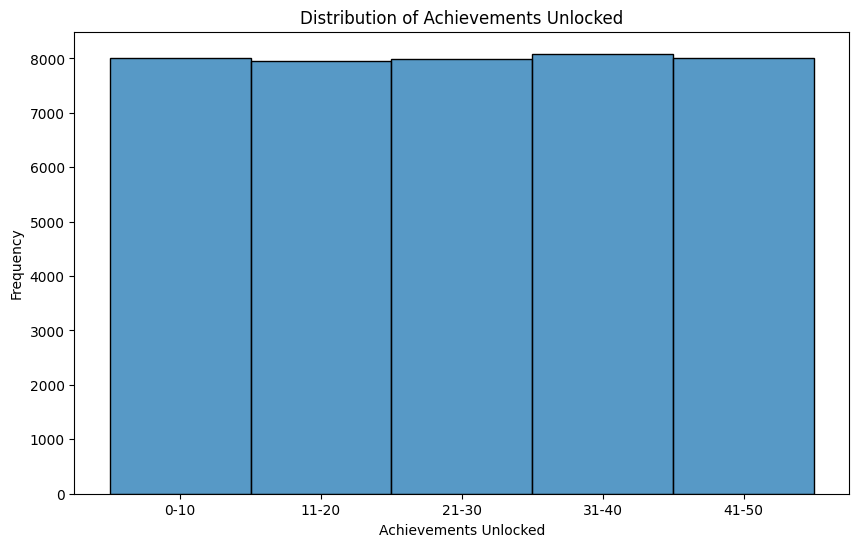

In [309]:
# Define the bins and labels for the groups
achievement_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
achievement_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column for Achievements Unlocked groups
game['AchievementGroup'] = pd.cut(game['AchievementsUnlocked'], bins=achievement_bins, labels=achievement_labels, right=False)

plt.figure(figsize=(10, 6))

sns.histplot(game['AchievementGroup'])
plt.title('Distribution of Achievements Unlocked')
plt.xlabel('Achievements Unlocked')
plt.ylabel('Frequency')
plt.show()


### Engagement Level

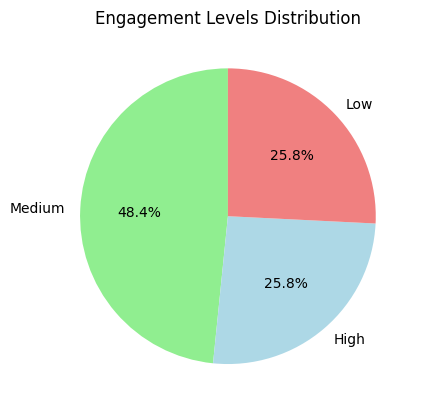

In [310]:
# Engagement Levels Distribution
game['EngagementLevel'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral'], startangle=90)
plt.title('Engagement Levels Distribution')
plt.ylabel('')
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/1153269807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=game, palette='viridis')


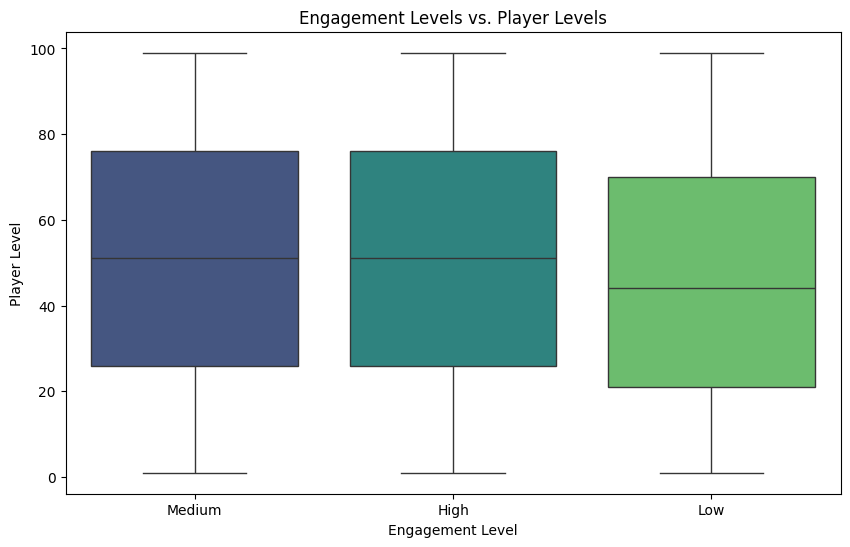

In [311]:
# Engagement Levels vs. Player Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=game, palette='viridis')
plt.title('Engagement Levels vs. Player Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Player Level')
plt.show()

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/1328440998.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/1328440998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/1328440998.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(

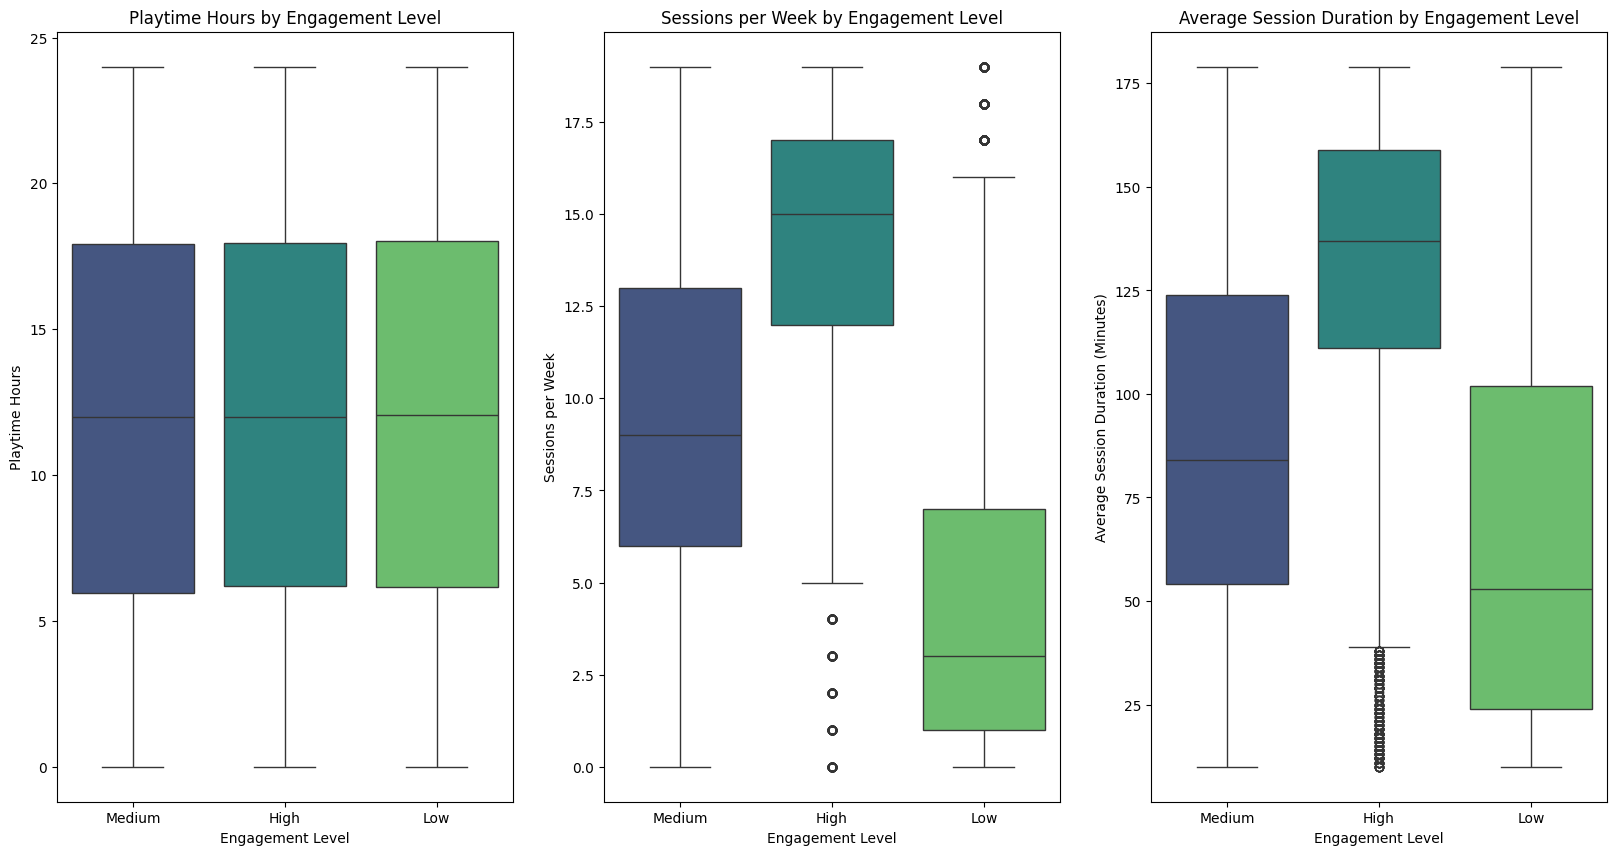

In [312]:
# Engagement Levels Analysis

# Set up the figure and axes for a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Playtime by Engagement Level
sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('Playtime Hours by Engagement Level')
axs[0].set_xlabel('Engagement Level')
axs[0].set_ylabel('Playtime Hours')

# Sessions per Week by Engagement Level
sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Sessions per Week by Engagement Level')
axs[1].set_xlabel('Engagement Level')
axs[1].set_ylabel('Sessions per Week')

# Average Session Duration by Engagement Level
sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=game, palette='viridis', ax=axs[2])
axs[2].set_title('Average Session Duration by Engagement Level')
axs[2].set_xlabel('Engagement Level')
axs[2].set_ylabel('Average Session Duration (Minutes)')

plt.show()

In [313]:
# Value Check
playtime_englevel = game.groupby('EngagementLevel')['PlayTimeHours'].describe()
playtime_englevel

,count,mean,std,min,25%,50%,75%,max
EngagementLevel,,,,,,,,
High,10336.0,12.069238,6.914363,0.000630,6.192524,11.981024,17.958875,23.996857
Low,10324.0,12.104915,6.886693,0.000158,6.161530,12.074409,18.022752,23.997838
Medium,19374.0,11.957503,6.929335,0.000115,5.955822,11.992280,17.934651,23.999592


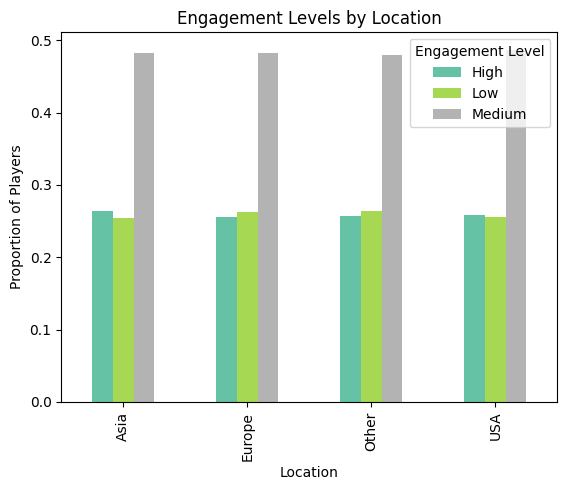

In [314]:
# Engagement Levels by Location
engagement_level_location = game.groupby('Location')['EngagementLevel'].value_counts(normalize=True).unstack().fillna(0)
engagement_level_location.plot(kind='bar', stacked=False, colormap='Set2')
plt.title('Engagement Levels by Location')
plt.xlabel('Location')
plt.ylabel('Proportion of Players')
plt.legend(title='Engagement Level')
plt.show()

In [315]:
# Value Check
eng_loc = game.groupby(['EngagementLevel', 'Location']).size().unstack(fill_value=0)
eng_loc

Location,Asia,Europe,Other,USA
EngagementLevel,,,,
High,2131,3068,1010,4127
Low,2058,3143,1036,4087
Medium,3906,5793,1889,7786


/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/872701588.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_gender_age = game.groupby(['Gender', 'AgeGroup'])['EngagementLevel'].value_counts().unstack()


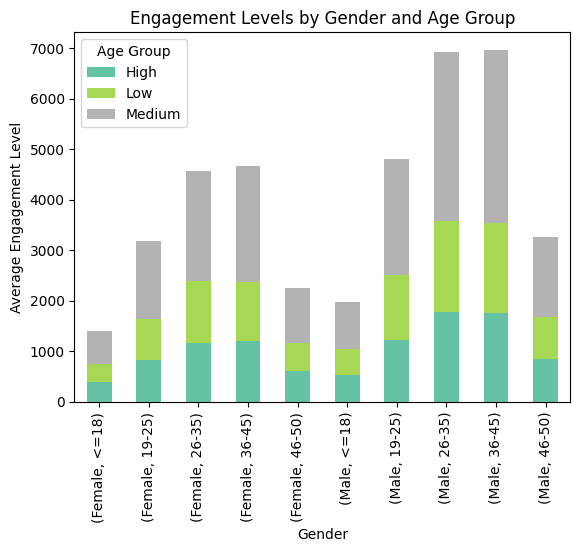

In [316]:
# Engagement Levels by Gender and Age Group
engagement_by_gender_age = game.groupby(['Gender', 'AgeGroup'])['EngagementLevel'].value_counts().unstack()
engagement_by_gender_age.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Engagement Levels by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Average Engagement Level')
plt.legend(title='Age Group')
plt.show()

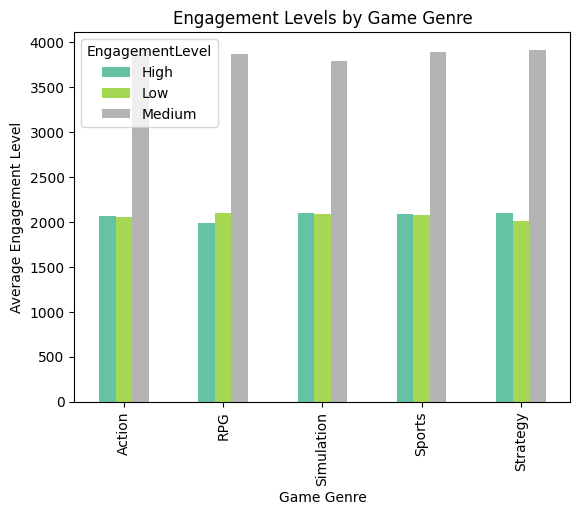

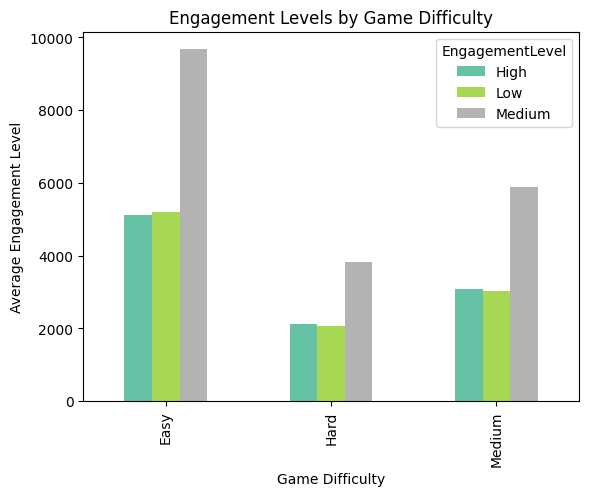

In [317]:
# Engagement Level by Genre and Difficulty Level
engagement_by_genre = game.groupby('GameGenre')['EngagementLevel'].value_counts().unstack()
engagement_by_difficulty = game.groupby('GameDifficulty')['EngagementLevel'].value_counts().unstack()

engagement_by_genre.plot(kind='bar', colormap='Set2')
plt.title('Engagement Levels by Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Average Engagement Level')
plt.show()

engagement_by_difficulty.plot(kind='bar', colormap='Set2')
plt.title('Engagement Levels by Game Difficulty')
plt.xlabel('Game Difficulty')
plt.ylabel('Average Engagement Level')
plt.show()


### InGame Purchase

/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/4131713363.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InGamePurchases', y='PlayTimeHours', data=game, palette='viridis', ax=axs[1])
/var/folders/kv/6kn50zx13db29c7_5l_npqc40000gn/T/ipykernel_1396/4131713363.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='InGamePurchases', y='PlayerLevel', data=game, palette='viridis', ax=axs[2])


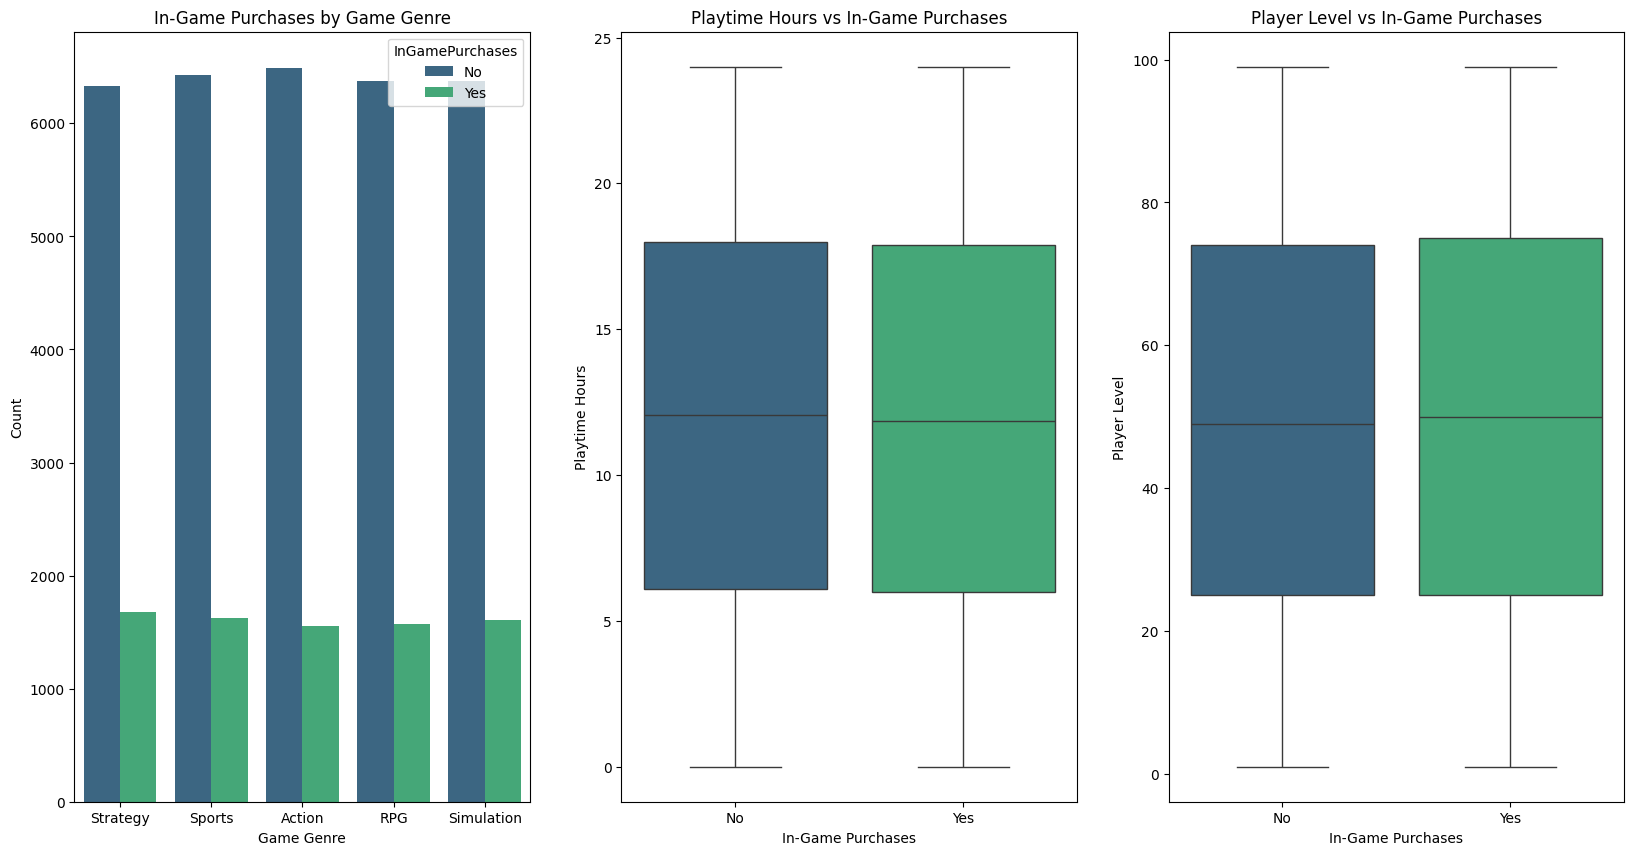

In [318]:
# In-Game Purchases Analysis

# Set up the figure and axes for a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# In-Game Purchases by Game Genre
sns.countplot(x='GameGenre', hue='InGamePurchases', data=game, palette='viridis', ax=axs[0])
axs[0].set_title('In-Game Purchases by Game Genre')
axs[0].set_xlabel('Game Genre')
axs[0].set_ylabel('Count')

# Playtime vs In-Game Purchases
sns.boxplot(x='InGamePurchases', y='PlayTimeHours', data=game, palette='viridis', ax=axs[1])
axs[1].set_title('Playtime Hours vs In-Game Purchases')
axs[1].set_xlabel('In-Game Purchases')
axs[1].set_ylabel('Playtime Hours')

# Player Level vs In-Game Purchases
sns.boxplot(x='InGamePurchases', y='PlayerLevel', data=game, palette='viridis', ax=axs[2])
axs[2].set_title('Player Level vs In-Game Purchases')
axs[2].set_xlabel('In-Game Purchases')
axs[2].set_ylabel('Player Level')

plt.show()

In [319]:
# Value Check
in_game_purchases_genre = game.groupby(['GameGenre', 'InGamePurchases']).size().unstack(fill_value=0)
in_game_purchases_genre

InGamePurchases,No,Yes
GameGenre,,
Action,6486,1553
RPG,6376,1576
Simulation,6373,1610
Sports,6426,1622
Strategy,6332,1680


In [320]:
# Value Check
playtime_purchases = game.groupby('InGamePurchases')['PlayTimeHours'].describe()
playtime_purchases

,count,mean,std,min,25%,50%,75%,max
InGamePurchases,,,,,,,,
No,31993.0,12.045395,6.917056,0.000158,6.090905,12.061993,17.985337,23.999592
Yes,8041.0,11.940694,6.904805,0.000115,5.990714,11.854957,17.883685,23.997245


In [321]:
# Value Check
level_purchases = game.groupby('InGamePurchases')['PlayerLevel'].describe()
level_purchases

,count,mean,std,min,25%,50%,75%,max
InGamePurchases,,,,,,,,
No,31993.0,49.562060,28.551690,1.0,25.0,49.0,74.0,99.0
Yes,8041.0,50.027609,28.732658,1.0,25.0,50.0,75.0,99.0


### Correlation

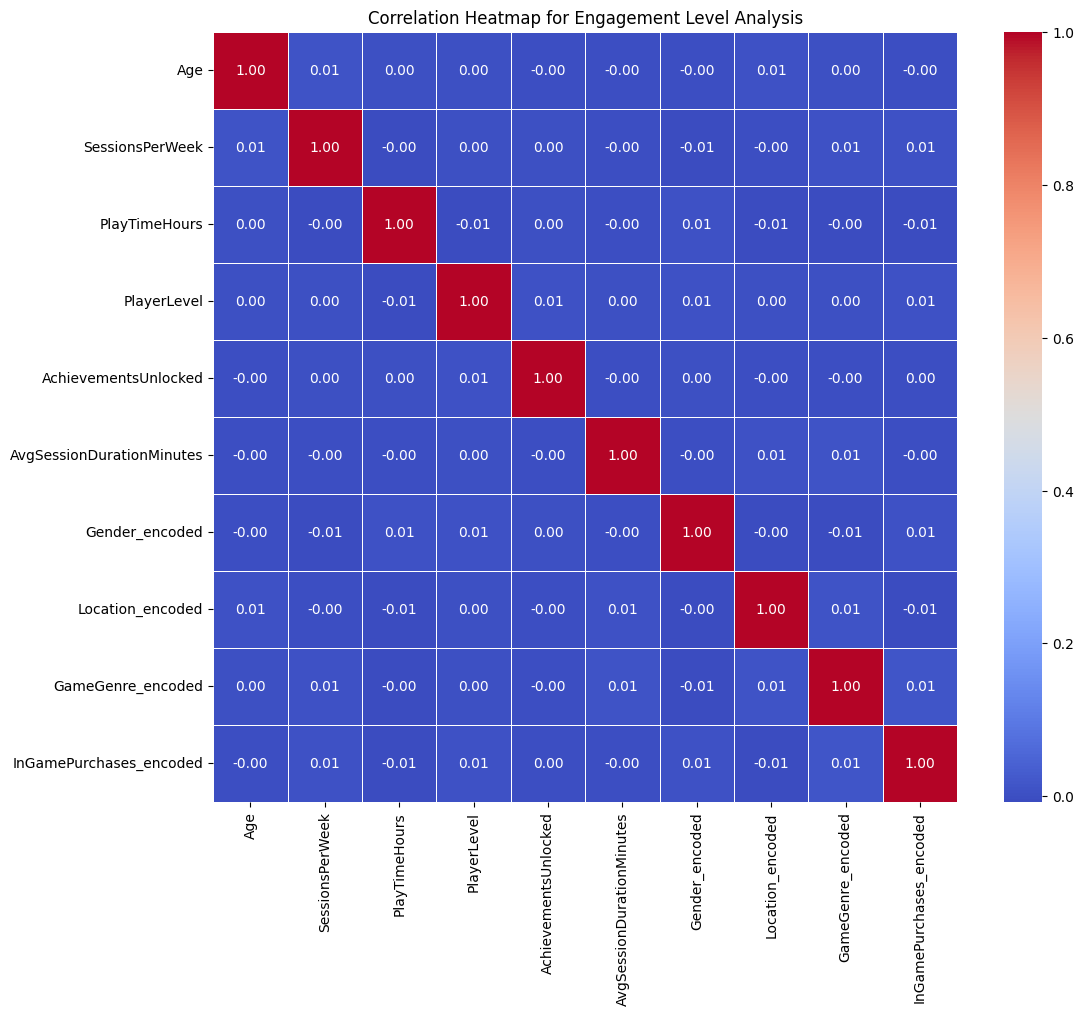

In [322]:
# Encoding categorical variables
game['Gender_encoded'] = game['Gender'].astype('category').cat.codes
game['Location_encoded'] = game['Location'].astype('category').cat.codes
game['GameGenre_encoded'] = game['GameGenre'].astype('category').cat.codes
game['InGamePurchases_encoded'] = game['InGamePurchases'].astype('category').cat.codes


# Selecting relevant columns for the heatmap
columns_for_heatmap = [
    'Age', 'SessionsPerWeek', 'PlayTimeHours', 'PlayerLevel', 
    'AchievementsUnlocked', 'AvgSessionDurationMinutes',
    'Gender_encoded', 'Location_encoded', 'GameGenre_encoded', 'InGamePurchases_encoded'
]

# Creating a correlation matrix
correlation_matrix = game[columns_for_heatmap].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Engagement Level Analysis')
plt.show()

# Feature Engineering

In [323]:
# Drop columns that are not needed for moodelling

game = game.drop(['PlayerID','AgeGroup', 'PlayerLevelGroup', 'AchievementGroup'], axis = 1)
game.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_encoded,Location_encoded,GameGenre_encoded,InGamePurchases_encoded
0,43,Male,Other,Strategy,16.271119,No,Medium,6,108,79,25,Medium,1,2,4,0
1,29,Female,USA,Strategy,5.525961,No,Medium,5,144,11,10,Medium,0,3,4,0
2,22,Female,USA,Sports,8.223755,No,Easy,16,142,35,41,High,0,3,3,0
3,35,Male,USA,Action,5.265351,Yes,Easy,9,85,57,47,Medium,1,3,0,1
4,33,Male,Europe,Action,15.531945,No,Medium,2,131,95,37,Medium,1,1,0,0


In [324]:
# Total Session Duration
game['TotalSessionDuration'] = game['AvgSessionDurationMinutes'] * game['SessionsPerWeek']

In [325]:
# Level-PlayTime Interaction
game['LevelPlayTimeInteraction'] = game['PlayerLevel'] * game['PlayTimeHours']

# Achievement Rate
game['AchievementRate'] = game['AchievementsUnlocked'] / game['PlayerLevel']

In [326]:
# Check the dataset
game

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_encoded,Location_encoded,GameGenre_encoded,InGamePurchases_encoded,TotalSessionDuration,LevelPlayTimeInteraction,AchievementRate
0,43,Male,Other,Strategy,16.271119,No,Medium,6,108,79,25,Medium,1,2,4,0,648,1285.418382,0.316456
1,29,Female,USA,Strategy,5.525961,No,Medium,5,144,11,10,Medium,0,3,4,0,720,60.785575,0.909091
2,22,Female,USA,Sports,8.223755,No,Easy,16,142,35,41,High,0,3,3,0,2272,287.831434,1.171429
3,35,Male,USA,Action,5.265351,Yes,Easy,9,85,57,47,Medium,1,3,0,1,765,300.125023,0.824561
4,33,Male,Europe,Action,15.531945,No,Medium,2,131,95,37,Medium,1,1,0,0,262,1475.534730,0.389474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,No,Easy,4,75,85,14,Medium,1,3,4,0,300,1752.671306,0.164706
40030,44,Female,Other,Simulation,13.539280,No,Hard,19,114,71,27,High,0,2,2,0,2166,961.288913,0.380282
40031,15,Female,USA,RPG,0.240057,Yes,Easy,10,176,29,1,High,0,3,1,1,1760,6.961650,0.034483
40032,34,Male,USA,Sports,14.017818,Yes,Medium,3,128,70,10,Medium,1,3,3,1,384,981.247258,0.142857


In [327]:
# Polynomial Features
numerical_columns = ['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(game[numerical_columns])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_columns))
data = pd.concat([game, poly_features_df], axis=1)

In [328]:
# Log Transformation
game['Log_PlayTimeHours'] = np.log1p(game['PlayTimeHours'])

In [329]:
# Frequency Encoding for Location
location_freq = game['Location'].value_counts() / len(game)
game['Location_freq'] = game['Location'].map(location_freq)

In [330]:
# One-hot encode remaining categorical variables (excluding the target variable 'EngagementLevel')
categorical_columns = ['Gender', 'GameGenre','GameDifficulty']
X = pd.get_dummies(game.drop(columns=['EngagementLevel','Location']), columns=categorical_columns, drop_first=True)

# Encode the target variable 'EngagementLevel'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(game['EngagementLevel'])

In [331]:
# Check the dataset
game

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,...,EngagementLevel,Gender_encoded,Location_encoded,GameGenre_encoded,InGamePurchases_encoded,TotalSessionDuration,LevelPlayTimeInteraction,AchievementRate,Log_PlayTimeHours,Location_freq
0,43,Male,Other,Strategy,16.271119,No,Medium,6,108,79,...,Medium,1,2,4,0,648,1285.418382,0.316456,2.849036,0.098291
1,29,Female,USA,Strategy,5.525961,No,Medium,5,144,11,...,Medium,0,3,4,0,720,60.785575,0.909091,1.875788,0.399660
2,22,Female,USA,Sports,8.223755,No,Easy,16,142,35,...,High,0,3,3,0,2272,287.831434,1.171429,2.221782,0.399660
3,35,Male,USA,Action,5.265351,Yes,Easy,9,85,57,...,Medium,1,3,0,1,765,300.125023,0.824561,1.835035,0.399660
4,33,Male,Europe,Action,15.531945,No,Medium,2,131,95,...,Medium,1,1,0,0,262,1475.534730,0.389474,2.805295,0.299845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,USA,Strategy,20.619662,No,Easy,4,75,85,...,Medium,1,3,4,0,300,1752.671306,0.164706,3.073603,0.399660
40030,44,Female,Other,Simulation,13.539280,No,Hard,19,114,71,...,High,0,2,2,0,2166,961.288913,0.380282,2.676854,0.098291
40031,15,Female,USA,RPG,0.240057,Yes,Easy,10,176,29,...,High,0,3,1,1,1760,6.961650,0.034483,0.215157,0.399660
40032,34,Male,USA,Sports,14.017818,Yes,Medium,3,128,70,...,Medium,1,3,3,1,384,981.247258,0.142857,2.709237,0.399660


In [332]:
# Initialize a dictionary to store the label encoders for each categorical feature
label_encoders = {}

# List of categorical features to be encoded
categorical_features = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel','InGamePurchases']

# Loop through each categorical feature and apply label encoding
for feature in categorical_features:
    le = LabelEncoder()
    game[feature] = le.fit_transform(game[feature])
    label_encoders[feature] = le

# Initialize a standard scaler for scaling numerical features
scaler = StandardScaler()

# List of numerical features to be scaled
numerical_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

# Fit and transform the numerical features with the standard scaler
game[numerical_features] = scaler.fit_transform(game[numerical_features])

In [333]:
# Check the dataset
game

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,...,EngagementLevel,Gender_encoded,Location_encoded,GameGenre_encoded,InGamePurchases_encoded,TotalSessionDuration,LevelPlayTimeInteraction,AchievementRate,Log_PlayTimeHours,Location_freq
0,1.096023,1,2,4,0.614176,0,2,-0.602363,0.269487,1.026459,...,2,1,2,4,0,648,1285.418382,0.316456,2.849036,0.098291
1,-0.297969,0,3,4,-0.939816,0,2,-0.775865,1.004019,-1.352160,...,2,0,3,4,0,720,60.785575,0.909091,1.875788,0.399660
2,-0.994965,0,3,3,-0.549654,0,0,1.132666,0.963212,-0.512647,...,0,0,3,3,0,2272,287.831434,1.171429,2.221782,0.399660
3,0.299456,1,3,0,-0.977506,1,0,-0.081854,-0.199798,0.256906,...,2,1,3,0,1,765,300.125023,0.824561,1.835035,0.399660
4,0.100314,1,1,0,0.507275,0,2,-1.296374,0.738771,1.586134,...,2,1,1,0,0,262,1475.534730,0.389474,2.805295,0.299845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,0.000744,1,3,4,1.243074,0,0,-0.949368,-0.403835,1.236337,...,2,1,3,4,0,300,1752.671306,0.164706,3.073603,0.399660
40030,1.195594,0,2,2,0.219091,0,1,1.653174,0.391909,0.746622,...,0,0,2,2,0,2166,961.288913,0.380282,2.676854,0.098291
40031,-1.691961,0,3,1,-1.704277,1,0,0.091649,1.656937,-0.722525,...,0,0,3,1,1,1760,6.961650,0.034483,0.215157,0.399660
40032,0.199885,1,3,3,0.288298,1,2,-1.122871,0.677560,0.711642,...,2,1,3,3,1,384,981.247258,0.142857,2.709237,0.399660


# Model Training

In [334]:
# Drop the target variable 'EngagementLevel' from the dataset to create the feature matrix X
X = game.drop(['EngagementLevel'], axis=1)

# Define the target variable y as 'EngagementLevel'
y = game['EngagementLevel']

# Split the dataset into training and testing sets
# 30% of the data will be used as the test set, and 70% will be used as the training set
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [335]:
# Check the dataset
game

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,...,EngagementLevel,Gender_encoded,Location_encoded,GameGenre_encoded,InGamePurchases_encoded,TotalSessionDuration,LevelPlayTimeInteraction,AchievementRate,Log_PlayTimeHours,Location_freq
0,1.096023,1,2,4,0.614176,0,2,-0.602363,0.269487,1.026459,...,2,1,2,4,0,648,1285.418382,0.316456,2.849036,0.098291
1,-0.297969,0,3,4,-0.939816,0,2,-0.775865,1.004019,-1.352160,...,2,0,3,4,0,720,60.785575,0.909091,1.875788,0.399660
2,-0.994965,0,3,3,-0.549654,0,0,1.132666,0.963212,-0.512647,...,0,0,3,3,0,2272,287.831434,1.171429,2.221782,0.399660
3,0.299456,1,3,0,-0.977506,1,0,-0.081854,-0.199798,0.256906,...,2,1,3,0,1,765,300.125023,0.824561,1.835035,0.399660
4,0.100314,1,1,0,0.507275,0,2,-1.296374,0.738771,1.586134,...,2,1,1,0,0,262,1475.534730,0.389474,2.805295,0.299845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,0.000744,1,3,4,1.243074,0,0,-0.949368,-0.403835,1.236337,...,2,1,3,4,0,300,1752.671306,0.164706,3.073603,0.399660
40030,1.195594,0,2,2,0.219091,0,1,1.653174,0.391909,0.746622,...,0,0,2,2,0,2166,961.288913,0.380282,2.676854,0.098291
40031,-1.691961,0,3,1,-1.704277,1,0,0.091649,1.656937,-0.722525,...,0,0,3,1,1,1760,6.961650,0.034483,0.215157,0.399660
40032,0.199885,1,3,3,0.288298,1,2,-1.122871,0.677560,0.711642,...,2,1,3,3,1,384,981.247258,0.142857,2.709237,0.399660


In [336]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

/Users/priyachaudhuri/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Logistic Regression
              precision    recall  f1-score   support

        High       0.90      0.83      0.86      2035
         Low       0.85      0.82      0.84      2093
      Medium       0.85      0.91      0.88      3879

    accuracy                           0.86      8007
   macro avg       0.87      0.85      0.86      8007
weighted avg       0.87      0.86      0.86      8007



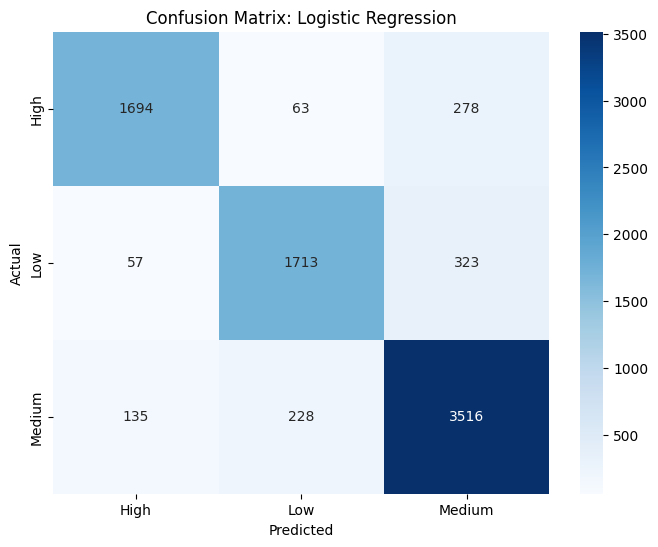

Classifier: SVM
              precision    recall  f1-score   support

        High       0.92      0.87      0.89      2035
         Low       0.87      0.84      0.85      2093
      Medium       0.88      0.93      0.90      3879

    accuracy                           0.89      8007
   macro avg       0.89      0.88      0.88      8007
weighted avg       0.89      0.89      0.89      8007



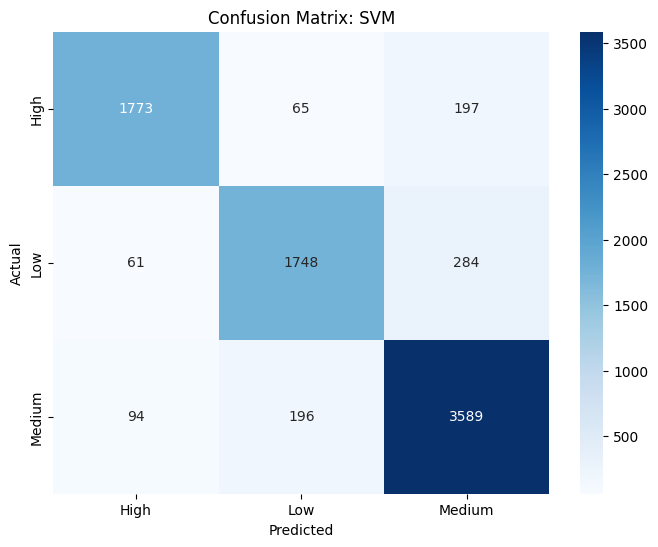

Classifier: KNN
              precision    recall  f1-score   support

        High       0.91      0.87      0.89      2035
         Low       0.85      0.85      0.85      2093
      Medium       0.89      0.90      0.90      3879

    accuracy                           0.88      8007
   macro avg       0.88      0.88      0.88      8007
weighted avg       0.88      0.88      0.88      8007



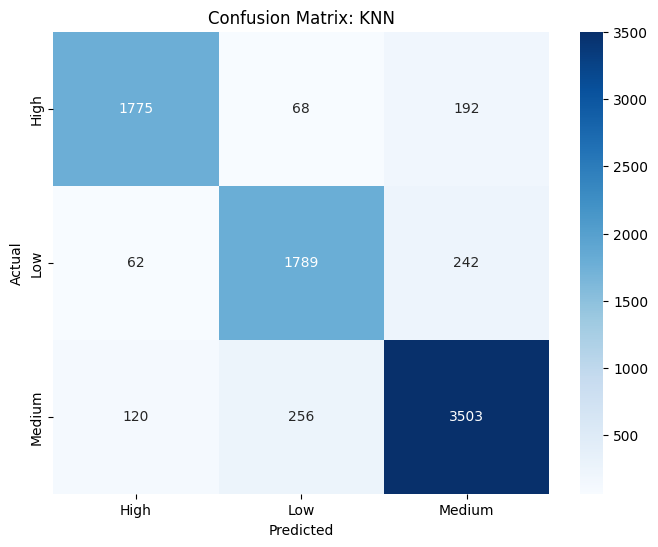

Classifier: Gradient Boosting
              precision    recall  f1-score   support

        High       0.93      0.89      0.91      2035
         Low       0.91      0.90      0.91      2093
      Medium       0.92      0.95      0.94      3879

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



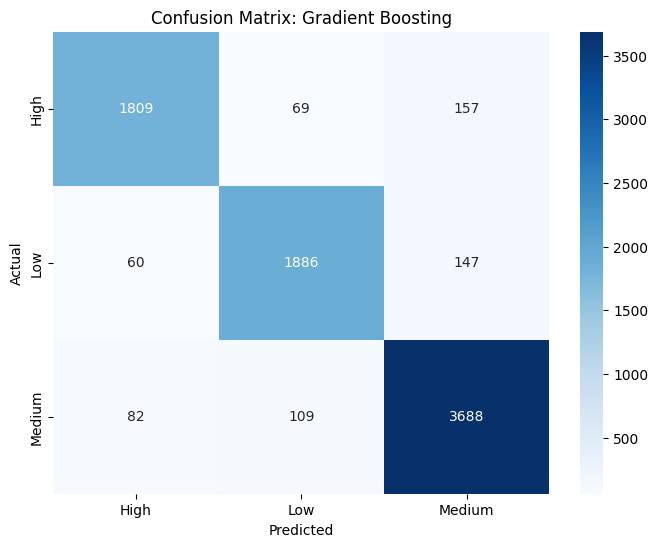

In [337]:
# Define a dictionary of classifiers with their respective names and initialized objects
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'Classifier: {name}')
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

Accuracy: 0.9194454852004496
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2035
           1       0.91      0.89      0.90      2093
           2       0.92      0.95      0.93      3879

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



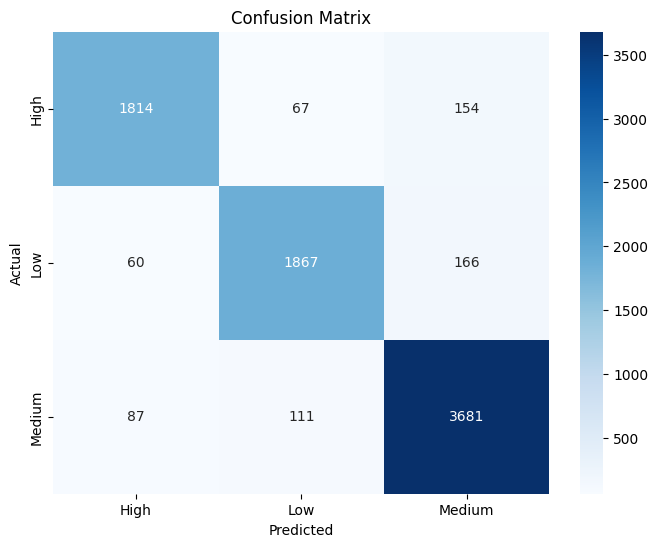

In [338]:
# Predict the target variable for the test data using the trained model
y_pred = model.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report for the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['EngagementLevel'].classes_, yticklabels=label_encoders['EngagementLevel'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

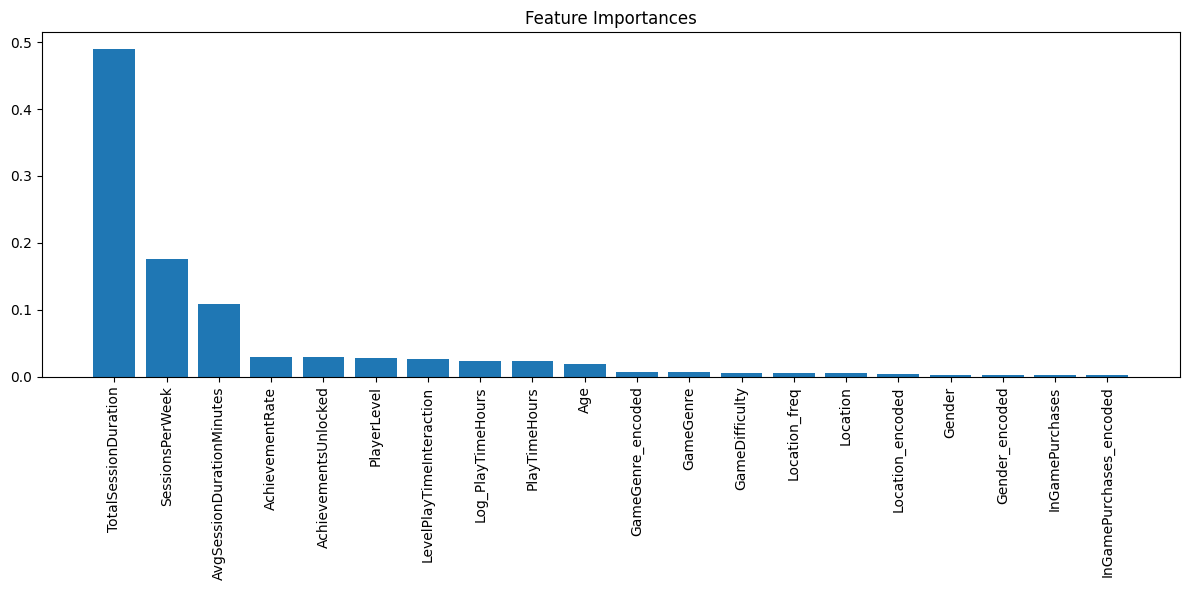

In [339]:
# Get the feature importances from the trained model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [340]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest model and parameter grid
# cv=3 indicates 3-fold cross-validation
# n_jobs=-1 uses all available processors
# verbose=2 provides detailed logs during the search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_

# Predict the target variable for the test data using the best estimator
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Model Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  25.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  21.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.2min
[CV] END m